### Decision Tree  Algorithm

Decision trees are a powerful prediction method and extremely popular.

They are popular because the final model is so easy to understand by practitioners and domain experts alike. The final decision tree can explain exactly why a specific prediction was made, making it very attractive for operational use.

Decision trees also provide the foundation for more advanced ensemble methods such as bagging, random forests and gradient boosting.

Reference: [How to implement decision tree from scratch in python](https://machinelearningmastery.com/implement-decision-tree-algorithm-scratch-python/)

#### The various decision tree algorithms following as:
   - ID3 (Only apply on classification problems and only allow to input discrete data)
   - C4.5 (Improve ID3 algorithm can apply on regression and classification problems, it also accept discrete data and continuous data)   
   - C5
   - CART (Classification and Regression Tree)(skit-learn use)

### 決策樹演算法概念:
   - 決策數的生成:
     - 依據屬性選擇指標(Information Gain, Gini Index or Chi-square, etc)尋找最佳節點(node)變數，並從節點變數中尋找最佳切割值
   - 目的:
     - 切割後同分支資料的同質性(Homogeneous)愈高愈好，不純度(Impurity)愈低愈好
   - 常見的屬性選擇指標:
     1. Information Gain(based on Entropy) $\to$ ID3, C4, C4.5, C5
     2. Gini Index $\to$ CART
     3. Chi-square test of Independence $\to$ CHAID

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import matplotlib

In [2]:
#print(np.__version__)
#print(pd.__version__)
#print(matplotlib.__version__)

### Entropy

   - 如果資料集合S具有n個不同的類別，那麼資料集合S的 *Entropy* 計算方式為:
     - $Entropy(s) = \sum_{i = 1}^{n}(-p_{i}log_{2}p_{i})$

In [3]:
import math

def Entropy(Prob):
    if sum(Prob) != 1:
        raise ValueError("The summation of probability must equal to 1.")
    entropy = 0
    for p in Prob:
        entropy += -p * math.log(p, 2)
    return entropy

In [4]:
prob = np.linspace(0, 1, 10000)
prob = np.delete(prob, [0, len(prob)-1])
complement_prob = np.abs(1 - prob)

prob_arr = np.c_[prob, complement_prob]

entropy_list = []
for arr in prob_arr:
    entropy_list.append(Entropy(arr))

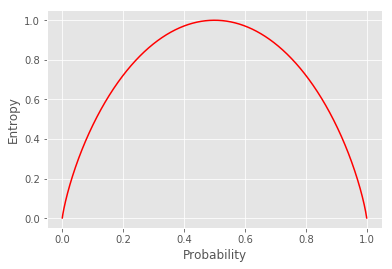

In [5]:
plt.style.use("ggplot")
plt.plot(prob, entropy_list, 'r')
plt.xlabel(s = 'Probability')
plt.ylabel(s = 'Entropy')
plt.show()

### 資訊獲取量 (Inforamtion Gain)
 - ID3 是利用 Information Gain 來衡量資料集中任一變數在特定值之下切割資料分類的好壞
 
 
 - 變數 A 在資料集 S 的資訊獲取量為:
   - $Gain(S, A) = Entropy(s) - \sum_{j = 1}^{v}\frac{\mid S_{j}\mid}{\mid S \mid} Entropy(S_{j})$
   
   
 - 假設變數$A$中有$v$個不同值$\{a1 , a2 ,…, av \}$，而資料集合$S$會因為這些不同值而產生(分割)出$v$個不同的資料子集合$\{S_{1}, S_{2},…,  S_{v}\}$
 
 
 - $Entropy(s)$: 資料$S$整體的亂度
 
 
 - $Entropy(s_{j})$: 資料子集合 $S_{j}$ 中的亂度, 其中 $j = 1, 2, 3,.., v$
 
 
 - $\frac{\mid S_{j} \mid}{\mid S \mid}$: 第 j 個子集合之資料個數佔總資料集合的比例(權重)
 
 
 - $Gain(S, A)$: 利用變數$A$對資料集合$S$進行分割的獲利
   - $Gain$值愈大，表示利用變數$A$來切割資料**亂度愈小**，用來**分類資料較佳**  
   - $Gain$值愈小，表示利用變數$A$來切割資料**亂度愈大**，用來**分類資料較差**

<img src="./picture/information_gain.PNG" width="450" heigh = "300" align = "left">


In [6]:
play_or_not = [0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0]
play_or_not = [bool(ele) for ele in play_or_not]
wind = ['weak', 'strong', 'weak', 'weak', 'weak', 'strong', 'weak', 
        'weak', 'weak', 'strong', 'strong', 'strong', "weak",'strong']
humidity = ["High", "High", "High", "High", 'Normal', 'Normal', 'Normal',
            'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'High']

dat = {"humidity": humidity, 'wind_strength': wind, "play": play_or_not}

df = pd.DataFrame(dat, columns = ['humidity', 'wind_strength', 'play'])
df.head(3)

,humidity,wind_strength,play
0,High,weak,False
1,High,strong,False
2,High,weak,True


In [7]:
def Information_Gain(df, target_variable, class_variable):

    total_df = df[target_variable].count()
    prob_target = df[target_variable].sum()/total_df
    entropy_s = Entropy([prob_target, 1 - prob_target]) # calculate Entropy of original dataset

    class_info = {}
    for class_type in df[class_variable].unique():  # calculate Entropy of subset
        subset = df[target_variable][df[class_variable] == class_type]
        if subset.count() == 0:
            prob_subset = 0
        else:
            prob_subset = subset.sum()/subset.count()
        entropy_si = Entropy([prob_subset, 1 - prob_subset])
        class_info[class_type] = [subset.count()/total_df, entropy_si]
    weight_entropy = 0 
    for sub_entropy in class_info.values():
        weight_entropy += sub_entropy[0]*sub_entropy[1]
    gain = entropy_s - weight_entropy
    return gain

In [8]:
IG_humidity = Information_Gain(df, target_variable = 'play', class_variable = 'humidity')
IG_wind = Information_Gain(df, target_variable = 'play', class_variable = 'wind_strength')

print("Humidity Information Gain: {:.5f}".format(IG_humidity))
print("wind strength Information Gain: {:.5f}".format(IG_wind))

Humidity Information Gain: 0.15184
wind strength Information Gain: 0.04813


### C4.5 
 
 - ID3演算法使用的資訊獲量會傾向選擇擁有較多類別的變數做為節點，而C4.5則是利用了正規化(Normalize)的概念改進了ID3的缺點，在計算資訊獲取量時，尚須計算該變數的分割資訊值(Split Information)，進而計算獲利比例(Gain Ratio)
 
 
 - $SplitInfo_{A}(S) = -\sum_{j = 1}^{v} \frac{\mid S_{j} \mid}{\mid S \mid} log_{2}{(\frac{\mid S_{j} \mid}{\mid S \mid})}$
 
 
 - $GainRatio(A) = Gain(S, A) \ / \ SplitInfo_{A}(S)$
 
 
 - $GainRatio$愈大，表示利用變數A來切割資料亂度愈小，用來分類資料較佳

In [9]:
def GainRatio(df, target_variable, class_variable): # modify Information_Gain function 

    total_df = df[target_variable].count()
    prob_target = df[target_variable].sum()/total_df
    entropy_s = Entropy([prob_target, 1 - prob_target]) # calculate Entropy of original dataset

    class_info = {}
    for class_type in df[class_variable].unique():  # calculate Entropy of subset
        subset = df[target_variable][df[class_variable] == class_type]
        if subset.count() == 0:
            prob_subset = 0
        else:
            prob_subset = subset.sum()/subset.count()
        entropy_si = Entropy([prob_subset, 1 - prob_subset])
        class_info[class_type] = [subset.count()/total_df, entropy_si]
    weight_entropy = 0
    split_info = 0
    for sub_entropy in class_info.values():
        split_info += (-sub_entropy[0])*np.log2(sub_entropy[0]) # calculate SplitInfo
        weight_entropy += sub_entropy[0]*sub_entropy[1]
        
    gain_ratio = (entropy_s - weight_entropy)/split_info
        
    return gain_ratio

In [10]:
GainR_humidity = GainRatio(df, target_variable = 'play', class_variable = 'humidity')
GainR_wind = GainRatio(df, target_variable = 'play', class_variable = 'wind_strength')

print("Humidity GainRatio: {:.5f}".format(GainR_humidity))
print("wind strength GainRatio: {:.5f}".format(GainR_wind))

Humidity GainRatio: 0.15184
wind strength GainRatio: 0.04885


### CART 
  - CART與ID3、C4.5與C5.0演算法的最大差異為在每一個節點上都是採用二分法，也就是每個節點只能有兩個分支，而 ID3、C4.5與 C5.0則在每個節點上能有多個不同的分支
  
  
  - 假設資料集合 S 中包含 n 個類別，則
    
    - $Gini(S) = 1 - \sum_{j = 1}^{n} P_{j}^{2}$, 其中 $P_{j}$ 為在S中屬於 j 類別的機率
  
  
  - 利用變數 A 切割資料集合 $S$ 為 $S_{1}$ 和 $S_{2}$(二元切割)，則利用此變數分割資料的 Gini Index 如下所示:
     
    - $Gini_{A}(S) = \frac{\mid S_{1}\mid}{\mid S \mid} Gini(S_{1}) + \frac{\mid S_{2}\mid}{\mid S \mid} Gini(S_{2})$ 
  
  
  - 不純度(Impurity)的降低值:
  
    - $\Delta Gini(A) = Gini(S) - Gini_{A}(S)$
  
  
  - 挑選擁有最大不純度的降低值，或是令 $Gini_{A}(S)$ 最小的變數做為切割資料的變數

In [11]:
def Gini_score(Prob):
    if sum(Prob) != 1:
        raise ValueError("The summation of probability must equal to 1.")
    temp_p = 0
    for p in Prob:
        temp_p += p**2
    gini = 1 - temp_p
    return gini

In [12]:
def Gini_Index(df, target_variable, class_variable):
    total_df = df[target_variable].count()
    prob_target = df[target_variable].sum()/total_df

    gini_s = Gini_score(Prob = [prob_target, 1 - prob_target])

    class_info = {}
    for class_type in df[class_variable].unique():    
        subset = df[target_variable][df[class_variable] == class_type]
        if subset.count() == 0:
            prob_subset = 0
        else:
            prob_subset = subset.sum()/subset.count()
        gini_si = Gini_score([prob_subset, 1 - prob_subset])
        class_info[class_type] = (subset.count()/total_df)*gini_si
    
    delta_gini = gini_s - sum(class_info.values())
    return delta_gini

In [13]:
gini_wind = Gini_Index(df, target_variable = 'play', class_variable = 'wind_strength')
gini_humidity = Gini_Index(df, target_variable = 'play', class_variable = 'humidity')

print("Humidity Gini-Index: {:.5f}".format(gini_humidity))
print("wind strength Gini-Index: {:.5f}".format(gini_wind))

Humidity Gini-Index: 0.09184
wind strength Gini-Index: 0.03061




#### scikit-learn uses an optimised version of the CART algorithm. [(skit-learn official Website)](http://scikit-learn.org/stable/modules/tree.html)

In [14]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [15]:
#print(sklearn.__version__)

In [16]:
iris = datasets.load_iris()
iris_arr = np.concatenate((iris.data, iris.target.reshape(-1, 1)), axis = 1)
col_names = iris.feature_names.copy()
col_names.append('species')
iris_df = pd.DataFrame(data = iris_arr, columns = col_names)
iris_df.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0


In [17]:
map_dic = {class_num : name for class_num, name in zip(np.unique(iris.target), iris.target_names)}
map_dic

{0: 'setosa', 1: 'versicolor', 2: 'virginica'}

In [18]:
def plot_iris(df, x_axis, y_axis, class_name):
    % matplotlib inline
    plt.figure()
    #plt.style.use('seaborn')
    subset = iris_df[[x_axis, y_axis, class_name]]

    class_num = subset[class_name].unique().astype(np.int64)
    for num in class_num:
        x = subset[x_axis][subset[class_name] == num]
        y = subset[y_axis][subset[class_name] == num]
        plt.scatter(x, y, color = ['r', 'g', 'b'][num], label = map_dic[num], s = 40)

    plt.legend(loc = 'best', prop={'size': 10})
    plt.xlabel(x_axis)
    plt.ylabel(y_axis)
    plt.show()

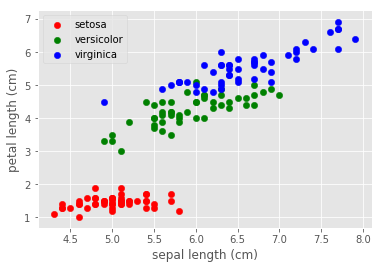

In [19]:
#print(plt.style.available) # can select plot style
plot_iris(df = iris_df, x_axis = 'sepal length (cm)', y_axis = 'petal length (cm)', class_name = 'species')

###  DecisionTreeClassifier

### [參數說明:](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier)
  
  - criterion: 用哪種指標當作分割節點的標準($Gini \ \to \ Gini \ Impurity$, $entropy \ \to \ Information \ Gain$)
  
  - splitter: 如何決定節點，有 `best`和`random`兩種，`best`指的是選取特徵中最好的分割點，`random`為特徵中隨機的分割點, default 為 `best`
  
  - max_depth: 樹的最大深度，達到樹的最大深度樹即停止生長，預設為`None`，若為`None`樹則會一直成長，直到所有葉節點的資料都一樣，或是直到所有葉節點的資料筆數小於`min_samples_split`所設定的大小
  
  - min_samples_split: 內部節點(internal node)能被切割的最少資料個數，預設值為2，若內部節點資料個數小於設定值，則停止生長
  
  - min_sample_leaf: 葉節點中最少的資料個數，如果小於等於設定值，則數會停止生長
  
  - max_features: 幾個特徵要被搜尋最佳切割點，預設值為`None`，即為所有特徵
  
  - max_leaf_nodes:最多有幾個葉節點，但若定設定過小的`max_leaf_nodes`則葉節點的impurity不會下降太多   
  
  - min_impurity_decrease: 若**impurity的下降值**低於此設定值，則不會再繼續進行切割
  
  - min_impurity_split: 讓樹能夠提早訓練結束的閥值，如果切割後的impurity高於設定值，則會進行切割(version 0.21 sklearn 將會用，`min_impurity_decrease`代替)
  
  - presort: 是否要對資料進行排序，預設值為`Fasle`，排序後對於樣本數不多的資料集訓練的速度或許會比較快

In [20]:
x, y = iris.data, iris.target
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

In [21]:
tree_clf = DecisionTreeClassifier(criterion = 'gini', splitter = 'best', max_depth = 3 , min_samples_split = 2, 
                                  max_features = None, min_impurity_decrease = 0.01)
tree_clf.fit(X = x_train, y = y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.01, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [22]:
prediction = tree_clf.predict(X = x_test)
prob_arr = tree_clf.predict_proba(X = x_test) # the probabilities of belonging to each class
prediction = prob_arr.argmax(axis = 1)

In [23]:
print("accuracy: {:.2f}".format(tree_clf.score(X = x_test, y = y_test)))
print("-"*25)
print(metrics.classification_report(y_true = y_test, y_pred = prediction, target_names = map_dic.values()))
print("-"*25)
print(metrics.confusion_matrix(y_true = y_test, y_pred = prediction))

accuracy: 0.96
-------------------------
             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00        16
 versicolor       0.93      0.93      0.93        15
  virginica       0.93      0.93      0.93        14

avg / total       0.96      0.96      0.96        45

-------------------------
[[16  0  0]
 [ 0 14  1]
 [ 0  1 13]]


### Feature importances

#### 利用Gini Index 或是 Entropy 來進行判斷特徵重要性

In [24]:
feature_importance_dic = {'feature names': iris.feature_names, 'importances': tree_clf.feature_importances_}
feature_df = pd.DataFrame(data = feature_importance_dic)
feature_df = feature_df[feature_df['importances'] != 0] # delete feature importances equal 0

In [25]:
feature_df = feature_df.sort_values(by = 'importances', ascending = False).reset_index(drop = True)
feature_df['feature names'] = feature_df['feature names'].str.replace(pat = ' \([a-z]{,2}\)', repl = "")
feature_df

,feature names,importances
0,petal width,0.948703
1,petal length,0.051297


In [26]:
def adding_text(rectangle):
    # attach rectangle class to get axis and plotting information
    for rect in rectangle:
        height = rect.get_height()
        temp_x = rect.get_x()
        width = rect.get_width()
        plt.text(x = temp_x + width/2, y = height*1.03 , s = "%f"%(height), ha = 'center', va = 'center')
        # ha = horizontalaligment, va = verticalaligment

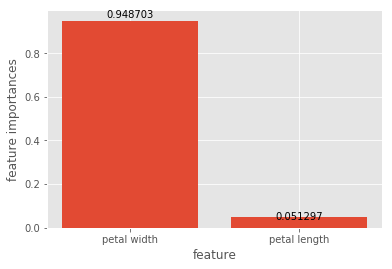

In [27]:
rect = plt.bar(x = feature_df.index, height = feature_df['importances'], align = 'center')
plt.xticks(feature_df.index, feature_df['feature names'].values)
plt.xlabel('feature')
plt.ylabel('feature importances')

adding_text(rectangle = rect)

plt.show()

### Visualize decision process
  - 必須先安裝 [graphviz](https://graphviz.gitlab.io/)和 graphviz 套件

In [28]:
from sklearn.tree import export_graphviz
import graphviz
import matplotlib.image as mpimg

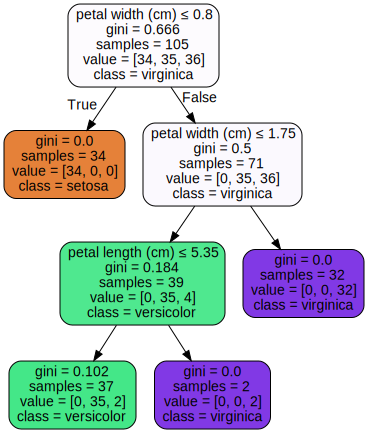

In [29]:
dot_data = export_graphviz(decision_tree = tree_clf, out_file = None, feature_names = iris.feature_names, filled = True, 
                           class_names = iris.target_names, special_characters=True, rounded = True)
graph = graphviz.Source(dot_data)
graph

### Output to Image

In [30]:
export_graphviz(decision_tree = tree_clf, out_file = './picture/tree.dot', feature_names = iris.feature_names, filled = True, 
                           class_names = iris.target_names, special_characters=True, rounded = True)

### transform dot file to png file

In [31]:
!dot -Tpng ./picture/tree.dot -o ./picture/tree.png 

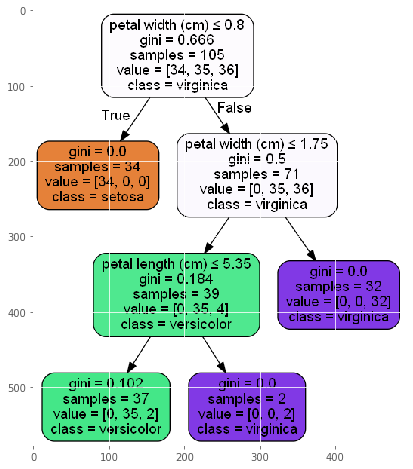

In [32]:
%matplotlib inline
img=mpimg.imread('./picture/tree.png')
plt.figure(figsize = (10, 8))
plt.imshow(img)